# 2021-09-13 new thinwall data

Steve did a new build with some thin walls, specifically to try and induce defects.

We'll got through a quick exploration here

~~~
hiya gang
The thin wall build was completed with the following parameters:
material - inconel 718 with PSD 45-90 micron
layer height - 0.53mm
traverse speed - 1000 mm/min
powder flow rate - 24 g/min (later reduced to 3.85V, which will be a different mass flow rate once the cal curve is established)
laser power - 2000W to start, reduction of 200 W every 2nd layer until a power of 1400W was reached
Carrier gas flow rate - 6 SLPM (Argon)
Shielding gas flow rate: 6SLPM @ 6bar input pressure (Argon)
variations in NGIF sample (require a calibration curve for powder flow to establish powder mass flow rate):
Layer 20 - traverse speed = 1300 mm/min
Layer 24 - traverse speed = 1000 mm/min
Layer 28 - laser power = 1100 W
Layer 32 - laser power = 1400 W
Layer 38 - laser power = 1700 W
Layer 42 - laser power = 1400 W
Layer 44 - traverse speed = 700 mm/min
Layer 48 - traverse speed = 1000 mm/min
Layer 60 - powder flow rate = 4.25 V
Layer 64 - powder flow rate = 3.85 V
Layer 68 - powder flow rate = 3.45 V
Layer 88 - powder flow rate = 4.25 V (edited) 

~~~

In [1]:
import sys
import os
import importlib # Used during testing if I need to reload modules

import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.stats

In [2]:
try:
    import ngif_romar.tools
except ModuleNotFoundError as error:
    # If not in path/installed, use relative import
    module_path = os.path.abspath(os.path.join(".."))
    sys.path.append(module_path)
    import ngif_romar.tools as tools

In [3]:
os.listdir(os.path.join("..", "data", "ngif_data_thinwall","ngif data"))

['20210831_1127_',
 '20210831_1615_',
 '20210902_1550_',
 '20210906_0918_',
 '20210906_1019_',
 '20210906_1339_',
 '20210913_0928_',
 'ngif-wall']

In [4]:
dataset_path = os.path.join(
    "..", "data", "ngif_data_thinwall","ngif data",
    '20210831_1127_',
)

logfile_path = os.path.join(dataset_path, "Data.dat")
meta_dict, data_df = tools.read_data(logfile_path)

data_df = tools.post_process_log_data(data_df)
data_df.head()

print(os.listdir(dataset_path))
frames_path = os.path.join(dataset_path, "Frames")

data_df = tools.link_camera_frames_to_df(data_df, frame_folder_path=frames_path)

print("Number of rows: {}, head:".format(len(data_df)))
data_df.head()

['Data.dat', 'Frames']
Number of rows: 6910, head:


,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename
0,21451,0.0,0.0,0.0,0.0,0.0,10628,1831.0,2000,0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,-1.0,20210831_112735__21419.dat
1,21551,0.0,0.0,0.0,0.0,0.0,11835,1838.0,2000,0,...,0.0,0.0,0.0,100,0,0.0,0.0,0.0,0.0,20210831_112735__21419.dat
2,21651,0.0,0.0,0.0,0.0,0.0,12021,1849.0,2000,0,...,0.0,0.0,0.0,200,0,0.0,0.0,0.0,0.0,20210831_112735__21419.dat
3,21751,0.0,0.0,0.0,0.0,0.0,11930,1863.0,2000,0,...,0.0,0.0,0.0,300,0,0.0,0.0,0.0,0.0,20210831_112735__21419.dat
4,21851,0.0,0.0,0.0,0.0,0.0,12347,1820.0,2000,0,...,0.0,0.0,0.0,400,0,0.0,0.0,0.0,0.0,20210831_112735__21419.dat


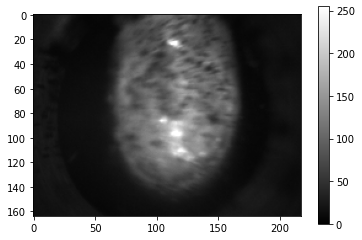

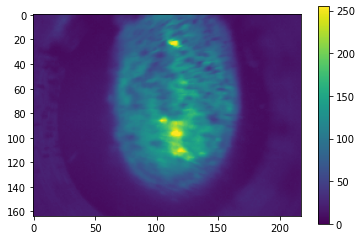

In [5]:
subset = data_df[
    data_df["toolpath_key"] == 7
]
framename = subset["matching_frame_filename"].values[5]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

# Plot without cmap to see if it's easier to see
fig, ax = plt.subplots()
imshow_result = ax.imshow(frame,  vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

In [6]:
# Try looking at recorded size per section
group_by = data_df.groupby("toolpath_key").mean().reset_index()
std_group_by = data_df.groupby("toolpath_key").std().reset_index()
group_by

,toolpath_key,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,...,v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart
0,-1.0,526259.083045,26.894522,-1.494810,41.703945,0.0,0.0,36.775087,322.588235,6.920415,...,1.462612e-03,0.002345,-0.838511,55.870197,9.445345e-08,0.0,3483.737024,26.894522,-1.494810,41.703945
1,0.0,24801.000000,14.053182,-0.704545,0.000000,0.0,0.0,11572.651515,1799.893939,2000.000000,...,7.727273e-06,0.008380,-0.036473,14.080607,-4.124625e-06,3350.0,0.000000,14.053182,-0.704545,0.000000
2,1.0,31551.000000,0.721343,-1.500000,0.530000,0.0,0.0,10118.119403,1800.373134,2000.000000,...,3.194030e-05,0.016391,-1.547195,28.021312,-4.607396e-04,3400.0,0.000000,0.721343,-1.500000,0.530000
3,2.0,38451.000000,-0.564373,-1.500000,1.060000,0.0,0.0,10082.223881,1768.492537,1911.940299,...,2.611940e-06,0.016419,-1.588005,28.318585,4.607559e-04,3400.0,0.000000,-0.564373,-1.500000,1.060000
4,3.0,45351.000000,-0.380134,-1.500000,1.590000,0.0,0.0,9233.761194,1751.089552,1807.462687,...,3.723881e-05,0.016394,-1.566677,27.906198,-4.607391e-04,3400.0,0.000000,-0.380134,-1.500000,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,94.0,667752.000000,0.517507,-1.500000,49.820000,0.0,0.0,10442.134328,1797.179104,1450.000000,...,3.888060e-05,0.016383,-1.557879,27.624085,4.607341e-04,3400.0,0.000000,0.517507,-1.500000,49.820000
96,95.0,674552.000000,0.254761,-1.500000,50.350000,0.0,0.0,9990.179104,1808.686567,1450.000000,...,7.462687e-07,0.016391,-1.561171,28.034172,-4.607417e-04,3400.0,0.000000,0.254761,-1.500000,50.350000
97,96.0,681402.000000,-0.416121,-1.500000,50.880000,0.0,0.0,10432.621212,1797.030303,1450.000000,...,0.000000e+00,0.016530,-1.593791,27.285593,4.676677e-04,3350.0,0.000000,-0.416121,-1.500000,50.880000
98,97.0,688252.000000,0.315000,-1.500000,51.410000,0.0,0.0,10117.970149,1811.626866,1450.000000,...,2.194030e-05,0.016448,-1.549203,27.783864,-4.607698e-04,3400.0,0.000000,0.315000,-1.500000,51.410000


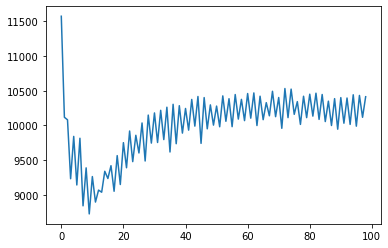

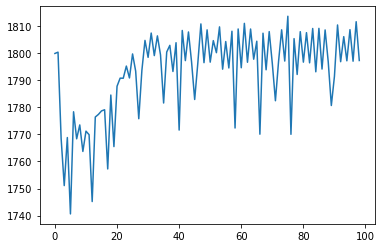

In [7]:
subset = group_by[
    group_by["toolpath_key"] > -1
]

fig, ax = plt.subplots()
ax.plot(subset["toolpath_key"], subset["meltpoolSize"])
plt.show()

subset = group_by[
    group_by["toolpath_key"] > -1
]

fig, ax = plt.subplots()
ax.plot(subset["toolpath_key"], subset["meltpoolTemp"])
plt.show()

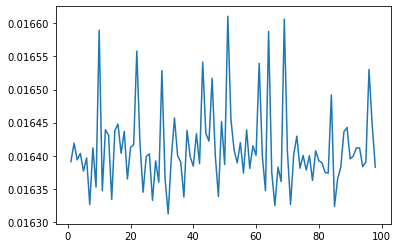

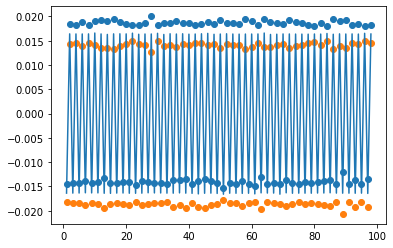

In [8]:
subset = group_by[
    group_by["toolpath_key"] > 0
]

fig, ax = plt.subplots()
ax.plot(subset["toolpath_key"], subset["|v|(mm/ms)"])
plt.show()

subset = group_by[
    group_by["toolpath_key"] > 0
]
std_subset = std_group_by[
    std_group_by["toolpath_key"] > 0
]

fig, ax = plt.subplots()
ax.plot(subset["toolpath_key"], subset["v_x(mm/ms)"])
ax.scatter(std_subset["toolpath_key"], subset["v_x(mm/ms)"] + std_subset["v_x(mm/ms)"])
ax.scatter(std_subset["toolpath_key"], subset["v_x(mm/ms)"] - std_subset["v_x(mm/ms)"])
plt.show()

Okay: jagged edges from moving backwards and forwards, part of plume being cut off?

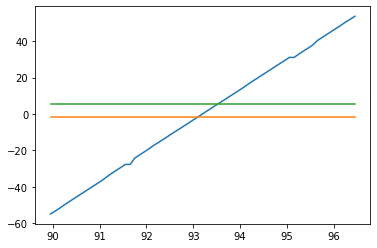

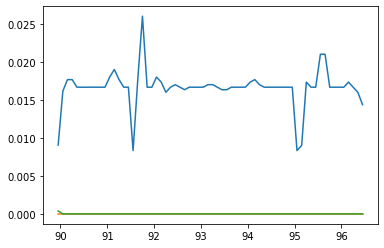

In [9]:
subset = data_df[
    data_df["toolpath_key"] == 10
]

fig, ax = plt.subplots()
ax.plot(subset["t(s)"], subset["x"], label="X")
ax.plot(subset["t(s)"], subset["y"], label="Y")
ax.plot(subset["t(s)"], subset["z"], label="Z")
plt.show()

fig, ax = plt.subplots()
ax.plot(subset["t(s)"], subset["v_x(mm/ms)"], label="v_x")
ax.plot(subset["t(s)"], subset["v_y(mm/ms)"], label="v_y")
ax.plot(subset["t(s)"], subset["v_z(mm/ms)"], label="v_z")
plt.show()

## Idea:

Measure melt pool width, as we're travelling backwards and forwards we should be able to do a linescan

These two/three cells are me trying to work out an appropriate threshold, and a nice image to start working with

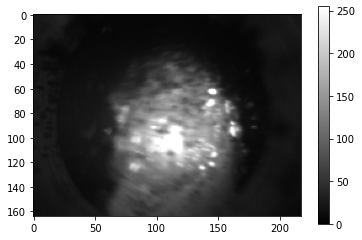

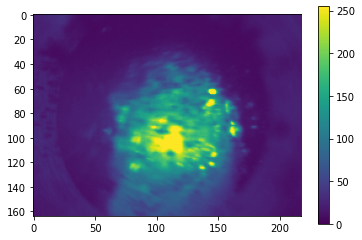

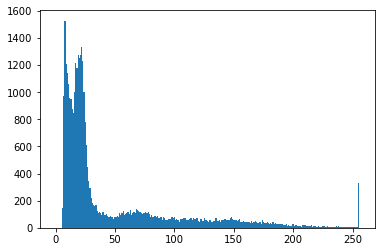

In [10]:
# Background, hopefully
subset = data_df[
    data_df["toolpath_key"] == -1
]
framename = subset["matching_frame_filename"].values[3]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

# Plot without cmap to see if it's easier to see
fig, ax = plt.subplots()
imshow_result = ax.imshow(frame,  vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

fig, ax = plt.subplots()
ax.hist(frame.flatten(), bins=np.arange(-0.5, 256, 1))
plt.show()

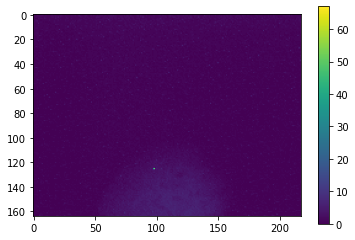

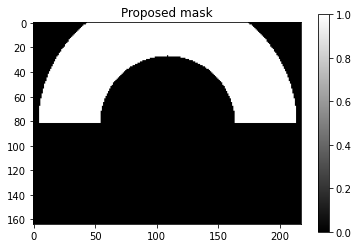

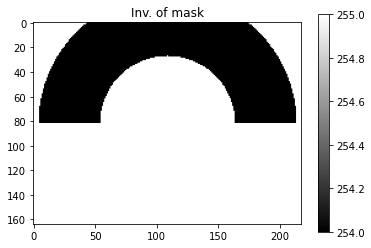

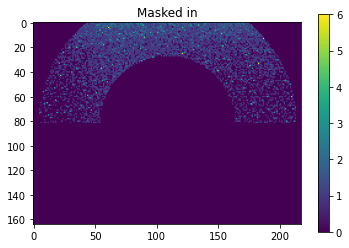

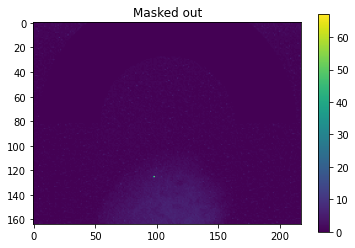

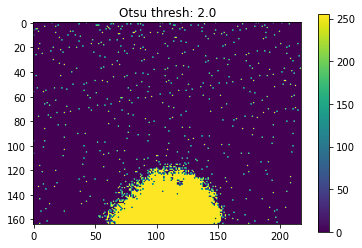

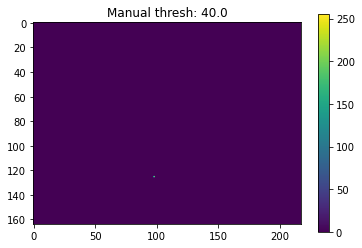

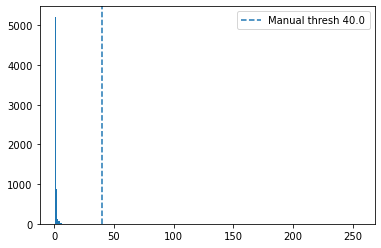

In [11]:
# Try masking
# Background, hopefully
subset = data_df[
    data_df["laser_off_time(ms)"] > 200
]
framename = subset["matching_frame_filename"].values[3]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame)
fig.colorbar(imshow_result)
plt.show()

# Create a mask
ii, jj = np.indices(frame.shape)
# Centring coords
ii = ii - frame.shape[0]//2
jj = jj - frame.shape[1]//2
# Will be used for mask; at the moment an array of distance from centre
distances = np.linalg.norm([ii,jj], axis=0)
mask = np.zeros_like(frame)
mask[
    (distances > 55)
    & (distances < 105)
    & (ii < 0) #Getting upper part, chosen image has a tail
] = 1

masked_in = frame*mask
masked_out = frame*(~mask//255)

fig, ax = plt.subplots()
imshow_result = ax.imshow(mask, cmap='gray')
fig.colorbar(imshow_result)
ax.set_title("Proposed mask")
plt.show()

fig, ax = plt.subplots()
imshow_result = ax.imshow(~mask, cmap='gray')
fig.colorbar(imshow_result)
ax.set_title("Inv. of mask")
plt.show()

fig, ax = plt.subplots()
imshow_result = ax.imshow(masked_in)
fig.colorbar(imshow_result)
ax.set_title("Masked in")
plt.show()

fig, ax = plt.subplots()
imshow_result = ax.imshow(masked_out)
fig.colorbar(imshow_result)
ax.set_title("Masked out")
plt.show()


otsu_thresh, thresh_img = cv2.threshold(frame, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, ax = plt.subplots()
imshow_result = ax.imshow(thresh_img)
fig.colorbar(imshow_result)
ax.set_title("Otsu thresh: {}".format(otsu_thresh))
plt.show()

manual_thresh = 40
manual_thresh, thresh_img = cv2.threshold(frame, manual_thresh, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots()
imshow_result = ax.imshow(thresh_img)
fig.colorbar(imshow_result)
ax.set_title("Manual thresh: {}".format(manual_thresh))
plt.show()

fig, ax = plt.subplots()
ax.hist(masked_in.flatten(), bins=np.arange(0.5, 256, 1))
ax.axvline(manual_thresh, linestyle="--", label="Manual thresh {}".format(manual_thresh))
ax.legend()
plt.show()

Looks like a thresh of 30/40 is acceptable

Maybe we should ask if we could get the calibration curve for the camera, or a rough estimate?

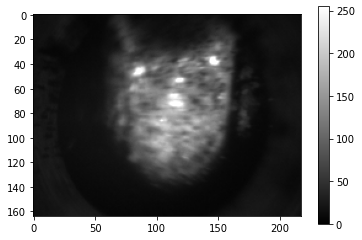

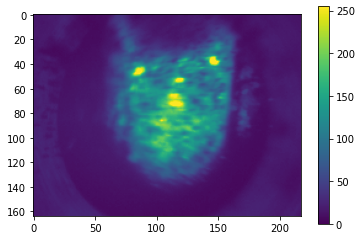

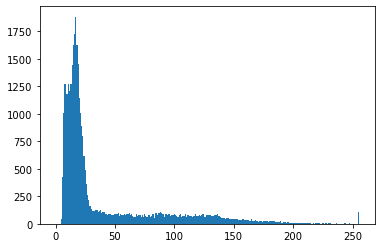

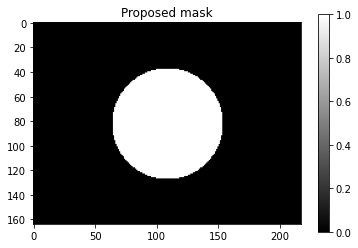

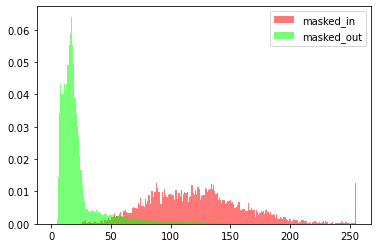

In [12]:
# Background, hopefully
subset = data_df[
    data_df["toolpath_key"] == 5
]
framename = subset["matching_frame_filename"].values[3]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

# Plot without cmap to see if it's easier to see
fig, ax = plt.subplots()
imshow_result = ax.imshow(frame,  vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

fig, ax = plt.subplots()
ax.hist(frame.flatten(), bins=np.arange(-0.5, 256, 1))
plt.show()

# Look at centre and outside
# Create a mask
ii, jj = np.indices(frame.shape)
# Centring coords
ii = ii - frame.shape[0]//2
jj = jj - frame.shape[1]//2
# Will be used for mask; at the moment an array of distance from centre
distances = np.linalg.norm([ii,jj], axis=0)
mask = np.zeros_like(frame)
mask[
    (distances < 45)
] = 1

masked_in = frame*mask
masked_out = frame*(~mask//255)


fig, ax = plt.subplots()
imshow_result = ax.imshow(mask, cmap='gray')
fig.colorbar(imshow_result)
ax.set_title("Proposed mask")
plt.show()

bins = np.arange(0.5, 256, 1)
fig, ax = plt.subplots()
ax.hist(masked_in.flatten(), label="masked_in", bins=bins, density=True, color="#FF000088")
ax.hist(masked_out.flatten(), label="masked_out", bins=bins, density=True, color="#00FF0088")
ax.legend()
plt.show()

Based on this image, 50 seems like a good thresh

Should work that out programmatically

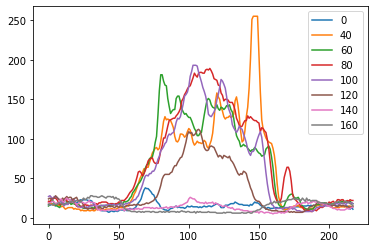

In [13]:
# Testing and dev
row_idx = [
    0, 
    40,
    60,
    80,
    100,
    120,
    140,
    160,
]
# for row_idx in range(0, frame.shape[0]):
fig, ax = plt.subplots()
for row_idx in row_idx:
    row = frame[row_idx, :]
    ax.plot(row, label=row_idx)
ax.legend()
plt.show()

In [14]:
# Create a function that finds longest width between points that thresh gets across
thresh = 50
row_idx = 100
row = frame[row_idx, :]

# From https://stackoverflow.com/questions/39594631/grouping-continguous-values-in-a-numpy-array-with-their-length
# https://stackoverflow.com/questions/45994973/how-to-count-continuous-numbers-in-numpy
mask = row > thresh

def measure_func(mask):
    """
    
    """
    # Find indexes where values do not equal previous/change
    idx = np.concatenate(([0],np.flatnonzero(mask[:-1]!=mask[1:])+1, [mask.size]))
    # Get labels by dereferencing indexes
    labels = mask[idx[:-1]]
    # Get length by difference in indexes
    lengths = np.diff(idx)
    
    true_lengths = lengths[labels]
    # Return largest true group
    if len(true_lengths) == 0:
        return 0
    return max(true_lengths)

measure_func(row > thresh)

87

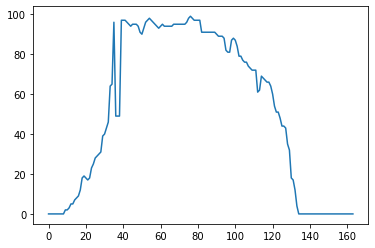

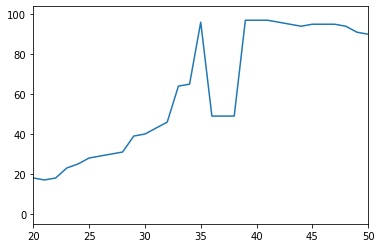

In [15]:
widths = []
idxs = []

for row_idx in range(0, frame.shape[0]):
# for row_idx in row_idx:
    row = frame[row_idx, :]
    widths.append(measure_func(row > thresh))
    idxs.append(row_idx)
    
fig, ax = plt.subplots()
ax.plot(widths)
# ax.set_xlim(20, 50)
plt.show()

# Width dip/spike present
fig, ax = plt.subplots()
ax.plot(widths)
ax.set_xlim(20, 50)
plt.show()


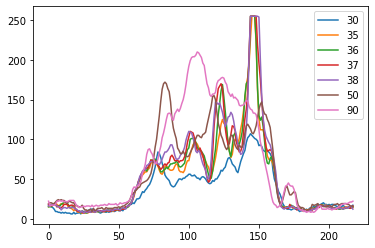

In [16]:
# Testing and dev
row_idx = [
    30, 35, 36, 37, 38, 50, 90
]
# for row_idx in range(0, frame.shape[0]):
fig, ax = plt.subplots()
for row_idx in row_idx:
    row = frame[row_idx, :]
    ax.plot(row, label=row_idx)
ax.legend()
plt.show()

Basically, that dip is right in the middle of the pattern in one of the tails, a small dip ends up separating the groups

Potentially an issue of thresh/pattern but still

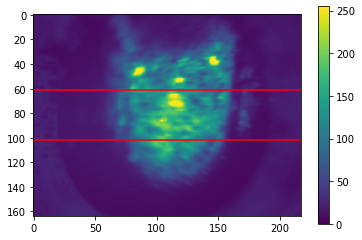

In [41]:
# Visualising area to measure

low_idx = 3*frame.shape[0]//8
high_idx = 5 * frame.shape[0]//8

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame,  vmin=0, vmax=255)
ax.axhline(low_idx, color='#FF0000FF')
ax.axhline(high_idx, color='#FF0000FF')
fig.colorbar(imshow_result)
plt.show()



In hindsight, we should really just look at say the middle third of the image and scan across that

In [42]:
def measure_width(frame, ):
    """
    Very simple and dumb function, assuming that the spot is always travelling up and down 
    in image/left to right, and is reasonably centred
    
    Looks at basically the middle part of image, scans by rows, does simple thresh, and finds largest continuous element
    and calls that the width
    
    """
    low_idx = 3*frame.shape[0]//8
    high_idx = 5 * frame.shape[0]//8
    thresh = 50
    widths = []
    for row_idx in range(low_idx, high_idx):
        threshed = frame[row_idx] > thresh
        width = measure_func(threshed)
        widths.append(width)
    return widths
        
    

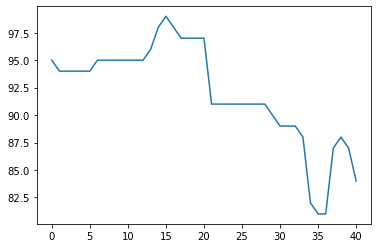

In [43]:
widths = measure_width(frame)
fig, ax = plt.subplots()
ax.plot(widths)
plt.show()

In [62]:
subset = data_df[
    data_df["toolpath_key"] == 10
]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

mean_widths = []
framenames = np.unique(subset["matching_frame_filename"])
print(len(framenames))
for framename in framenames:
    frame = tools.read_and_convert_image(os.path.join(frames_path, framename))
    mean_width = np.mean(measure_width(frame))
    mean_widths.append(mean_width)
    
    

8


In [59]:
mean_widths

[85.6829268292683,
 85.0,
 82.39024390243902,
 74.04878048780488,
 81.4390243902439,
 74.1219512195122,
 76.1219512195122,
 77.41463414634147]

In [69]:
mean_result_dict = {}
sd_result_dict = {}
subset = data_df[
    data_df["laser_on_time(ms)"] > 200
]
framenames = np.unique(subset["matching_frame_filename"])
for i, framename in enumerate(framenames):
    print("{} of {}           \r".format(i, len(framenames)), end='')
    frame = tools.read_and_convert_image(os.path.join(frames_path, framename))
    mean_width = np.mean(measure_width(frame))
    sd_width = np.std(measure_width(frame))
    mean_result_dict[framename] = mean_width
    sd_result_dict[framename] = sd_width
    
data_df["mean_width"] = data_df["matching_frame_filename"].map(mean_result_dict)
data_df["sd_width"] = data_df["matching_frame_filename"].map(sd_result_dict)

In [72]:
data_df["mean_width"] = data_df["matching_frame_filename"].map(mean_result_dict)
data_df["sd_width"] = data_df["matching_frame_filename"].map(sd_result_dict)

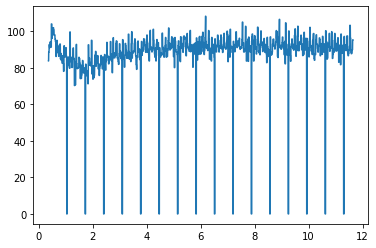

In [73]:
subset = data_df[
    data_df["laser_on_time(ms)"] > 200
]
fig, ax = plt.subplots()
ax.plot(subset['t(min)'], subset["mean_width"])
plt.show()

In [75]:
# Why are some values zero?
subset[
    subset["mean_width"] < 40
]

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename,mean_width,sd_width
406,62051,-50.993,-1.5,2.65,0.0,0.0,9608,1820.0,1800,0,...,-0.000010,6500,0,-50.993,-1.5,2.65,5.0,20210831_112816__62454.dat,0.0,0.0
407,62151,-52.660,-1.5,2.65,0.0,0.0,9103,1829.0,1800,0,...,-0.000009,6600,0,-52.660,-1.5,2.65,5.0,20210831_112816__62454.dat,0.0,0.0
408,62251,-54.326,-1.5,2.65,0.0,0.0,8188,1806.0,1800,0,...,-0.000006,6700,0,-54.326,-1.5,2.65,5.0,20210831_112816__62454.dat,0.0,0.0
413,62751,-51.140,-1.5,3.18,0.0,0.0,11115,1796.0,1800,0,...,0.000010,300,0,-51.140,-1.5,3.18,6.0,20210831_112816__62454.dat,0.0,0.0
414,62851,-49.274,-1.5,3.18,0.0,0.0,10875,1777.0,1800,0,...,0.000011,400,0,-49.274,-1.5,3.18,6.0,20210831_112816__62454.dat,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,677652,-51.460,-1.5,50.35,0.0,0.0,9002,1862.0,1450,0,...,-0.000009,6500,0,-51.460,-1.5,50.35,95.0,20210831_113831__678018.dat,0.0,0.0
6563,677752,-53.126,-1.5,50.35,0.0,0.0,8206,1865.0,1450,0,...,-0.000009,6600,0,-53.126,-1.5,50.35,95.0,20210831_113831__678018.dat,0.0,0.0
6564,677852,-54.790,-1.5,50.35,0.0,0.0,7358,1835.0,1450,0,...,-0.000005,6700,0,-54.790,-1.5,50.35,95.0,20210831_113831__678018.dat,0.0,0.0
6569,678352,-50.474,-1.5,50.88,0.0,0.0,11445,1791.0,1450,0,...,0.000011,300,0,-50.474,-1.5,50.88,96.0,20210831_113831__678018.dat,0.0,0.0


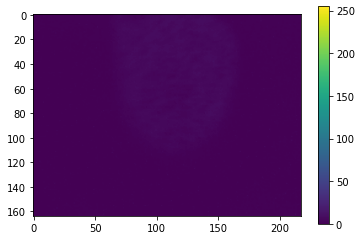

In [78]:
framename = subset[
    subset["mean_width"] < 40
]["matching_frame_filename"].values[2]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame,  vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

In [84]:
subset_2 = data_df[
    data_df["matching_frame_filename"] == framename
]
subset_2

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename,mean_width,sd_width
406,62051,-50.993,-1.5,2.650,0.0,0.0,9608,1820.0,1800,0,...,-0.000010,6500,0,-50.993,-1.5,2.650,5.0,20210831_112816__62454.dat,0.0,0.0
407,62151,-52.660,-1.5,2.650,0.0,0.0,9103,1829.0,1800,0,...,-0.000009,6600,0,-52.660,-1.5,2.650,5.0,20210831_112816__62454.dat,0.0,0.0
408,62251,-54.326,-1.5,2.650,0.0,0.0,8188,1806.0,1800,0,...,-0.000006,6700,0,-54.326,-1.5,2.650,5.0,20210831_112816__62454.dat,0.0,0.0
409,62351,-55.000,-1.5,2.650,0.0,0.0,0,1570.0,0,0,...,-0.000002,0,100,-55.000,-1.5,2.650,-1.0,20210831_112816__62454.dat,0.0,0.0
410,62451,-55.015,-1.5,3.179,0.0,0.0,0,25.0,0,0,...,0.000001,0,200,-55.015,-1.5,3.179,-1.0,20210831_112816__62454.dat,0.0,0.0
411,62551,-54.540,-1.5,3.180,0.0,0.0,10265,1753.0,1800,0,...,0.000006,100,0,-54.540,-1.5,3.180,6.0,20210831_112816__62454.dat,0.0,0.0
412,62651,-52.874,-1.5,3.180,0.0,0.0,11264,1780.0,1800,0,...,0.000009,200,0,-52.874,-1.5,3.180,6.0,20210831_112816__62454.dat,0.0,0.0
413,62751,-51.140,-1.5,3.180,0.0,0.0,11115,1796.0,1800,0,...,0.000010,300,0,-51.140,-1.5,3.180,6.0,20210831_112816__62454.dat,0.0,0.0
414,62851,-49.274,-1.5,3.180,0.0,0.0,10875,1777.0,1800,0,...,0.000011,400,0,-49.274,-1.5,3.180,6.0,20210831_112816__62454.dat,0.0,0.0
415,62951,-47.540,-1.5,3.180,0.0,0.0,10829,1787.0,1800,0,...,0.000011,500,0,-47.540,-1.5,3.180,6.0,20210831_112816__62454.dat,0.0,0.0


Issue spotted: sometimes we can get unlucky and get frame from a period where laser is off

We need to try and look at frame sections where there are no lasser off periods

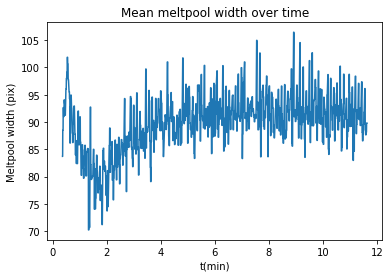

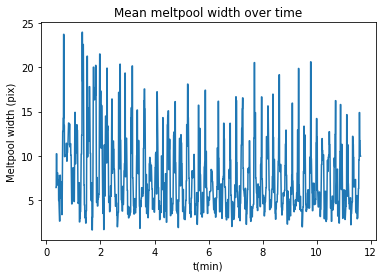

In [114]:
off_frame_names = np.unique(data_df[
    data_df["laser_off_time(ms)"] > 0
]["matching_frame_filename"])
subset = data_df[
    (data_df["laser_on_time(ms)"] > 100)
    & (~data_df["matching_frame_filename"].isin(off_frame_names))
]


fig, ax = plt.subplots()
ax.plot(subset['t(min)'], subset["mean_width"])
ax.set_xlabel("t(min)")
ax.set_ylabel("Meltpool width (pix)")
ax.set_title("Mean meltpool width over time")
plt.show()

fig, ax = plt.subplots()
ax.plot(subset['t(min)'], subset["sd_width"])
ax.set_xlabel("t(min)")
ax.set_ylabel("Meltpool width (pix)")
ax.set_title("Mean meltpool width over time")
plt.show()

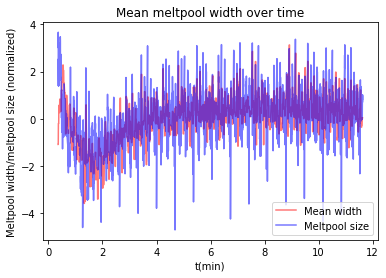

In [127]:
# Lets try and plot size and width on same axes; normalize by mean and std dev I guess
fig, ax = plt.subplots()
ax.plot(subset['t(min)'], (subset["mean_width"] - subset["mean_width"].mean()) / subset["mean_width"].std(),
       label="Mean width", color="#FF000088")
ax.plot(subset["t(min)"], (subset["meltpoolSize"] - subset["meltpoolSize"].mean()) / subset["meltpoolSize"].std(),
       label="Meltpool size", color="#0000FF88")
ax.set_xlabel("t(min)")
ax.set_ylabel("Meltpool width/meltpool size (normalized)")
ax.set_title("Mean meltpool width over time")
ax.legend()
plt.show()

Look at regions where the std dev in width is high

In [128]:
subset[
    subset["sd_width"] > 15
]

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename,mean_width,sd_width
165,37951,-9.274,-1.5,1.06,0.0,0.0,10241,1765.0,1900,0,...,0.000292,2900,0,-9.274,-1.5,1.06,2.0,20210831_112752__38432.dat,86.146341,23.732823
166,38051,-7.607,-1.5,1.06,0.0,0.0,10032,1759.0,1900,0,...,0.000435,3000,0,-7.607,-1.5,1.06,2.0,20210831_112752__38432.dat,86.146341,23.732823
167,38151,-5.940,-1.5,1.06,0.0,0.0,10013,1759.0,1900,0,...,0.000714,3100,0,-5.940,-1.5,1.06,2.0,20210831_112752__38432.dat,86.146341,23.732823
168,38251,-4.274,-1.5,1.06,0.0,0.0,9952,1760.0,1900,0,...,0.001374,3200,0,-4.274,-1.5,1.06,2.0,20210831_112752__38432.dat,86.146341,23.732823
169,38351,-2.607,-1.5,1.06,0.0,0.0,9758,1772.0,1900,0,...,0.004244,3300,0,-2.607,-1.5,1.06,2.0,20210831_112752__38432.dat,86.146341,23.732823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,653052,-17.140,-1.5,48.76,0.0,0.0,10283,1780.0,1450,0,...,0.000095,2400,0,-17.140,-1.5,48.76,92.0,20210831_113806__652995.dat,85.073171,15.796558
6317,653152,-15.474,-1.5,48.76,0.0,0.0,10267,1801.0,1450,0,...,0.000105,2500,0,-15.474,-1.5,48.76,92.0,20210831_113806__652995.dat,85.073171,15.796558
6318,653252,-13.807,-1.5,48.76,0.0,0.0,10236,1794.0,1450,0,...,0.000132,2600,0,-13.807,-1.5,48.76,92.0,20210831_113806__652995.dat,85.073171,15.796558
6319,653352,-12.140,-1.5,48.76,0.0,0.0,10278,1804.0,1450,0,...,0.000170,2700,0,-12.140,-1.5,48.76,92.0,20210831_113806__652995.dat,85.073171,15.796558


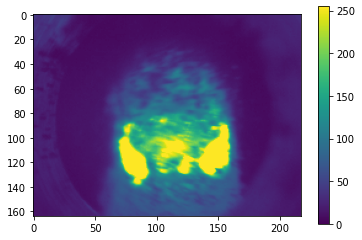

In [144]:
framename = np.unique(subset[
    subset["sd_width"] > 15
]["matching_frame_filename"])[-5]
frame = tools.read_and_convert_image(os.path.join(frames_path, framename))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame,  vmin=0, vmax=255)
fig.colorbar(imshow_result)
plt.show()

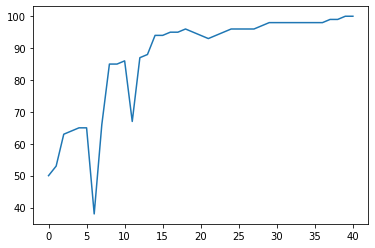

In [151]:
widths = measure_width(frame)
fig, ax = plt.subplots()
ax.plot(widths)
plt.show()

Issue here appears to becatching the edges or trails of the melt pool and that throwing things off

Might need to look at mean of some top portion

Showing the rows around these values in the next couple of bocks

In [145]:
print(len(data_df))

6910


In [146]:
data_df[
    data_df["matching_frame_filename"] == framename
]

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename,mean_width,sd_width
5240,545452,13.526,-1.5,40.28,0.0,0.0,10465,1780.0,1450,0,...,0.000141,4300,0,13.526,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5241,545552,14.993,-1.5,40.28,0.0,0.0,10349,1790.0,1450,0,...,0.000103,4400,0,14.993,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5242,545652,16.660,-1.5,40.28,0.0,0.0,10067,1778.0,1450,0,...,0.000090,4500,0,16.660,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5243,545752,18.326,-1.5,40.28,0.0,0.0,10536,1805.0,1450,0,...,0.000075,4600,0,18.326,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5244,545852,19.993,-1.5,40.28,0.0,0.0,10379,1782.0,1450,0,...,0.000063,4700,0,19.993,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5245,545952,21.660,-1.5,40.28,0.0,0.0,10334,1777.0,1450,0,...,0.000053,4800,0,21.660,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5246,546052,23.326,-1.5,40.28,0.0,0.0,10240,1777.0,1450,0,...,0.000046,4900,0,23.326,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5247,546152,24.993,-1.5,40.28,0.0,0.0,10424,1796.0,1450,0,...,0.000040,5000,0,24.993,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5248,546252,26.660,-1.5,40.28,0.0,0.0,10265,1796.0,1450,0,...,0.000035,5100,0,26.660,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5249,546352,28.326,-1.5,40.28,0.0,0.0,10318,1800.0,1450,0,...,0.000031,5200,0,28.326,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799


In [149]:
data_df.iloc[5235:5255]

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),xpart,ypart,zpart,toolpath_key,matching_frame_filename,mean_width,sd_width
5235,544952,4.993,-1.5,40.28,0.0,0.0,10428,1796.0,1450,0,...,0.001011,3800,0,4.993,-1.5,40.28,76.0,20210831_113618__544896.dat,90.487805,7.827787
5236,545052,6.660,-1.5,40.28,0.0,0.0,10240,1791.0,1450,0,...,0.000568,3900,0,6.660,-1.5,40.28,76.0,20210831_113618__544896.dat,90.487805,7.827787
5237,545152,8.326,-1.5,40.28,0.0,0.0,10122,1783.0,1450,0,...,0.000363,4000,0,8.326,-1.5,40.28,76.0,20210831_113618__544896.dat,90.487805,7.827787
5238,545252,9.993,-1.5,40.28,0.0,0.0,10054,1775.0,1450,0,...,0.000252,4100,0,9.993,-1.5,40.28,76.0,20210831_113618__544896.dat,90.487805,7.827787
5239,545352,11.660,-1.5,40.28,0.0,0.0,10236,1781.0,1450,0,...,0.000193,4200,0,11.660,-1.5,40.28,76.0,20210831_113618__544896.dat,90.487805,7.827787
5240,545452,13.526,-1.5,40.28,0.0,0.0,10465,1780.0,1450,0,...,0.000141,4300,0,13.526,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5241,545552,14.993,-1.5,40.28,0.0,0.0,10349,1790.0,1450,0,...,0.000103,4400,0,14.993,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5242,545652,16.660,-1.5,40.28,0.0,0.0,10067,1778.0,1450,0,...,0.000090,4500,0,16.660,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5243,545752,18.326,-1.5,40.28,0.0,0.0,10536,1805.0,1450,0,...,0.000075,4600,0,18.326,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799
5244,545852,19.993,-1.5,40.28,0.0,0.0,10379,1782.0,1450,0,...,0.000063,4700,0,19.993,-1.5,40.28,76.0,20210831_113619__545897.dat,87.073171,15.954799


Measure the middle quarter of the image, take the top half of the widths returned, see how stable that is

In [161]:
filtered_mean_result_dict = {}
filtered_sd_result_dict = {}
subset = data_df[
    data_df["laser_on_time(ms)"] > 200
]
framenames = np.unique(subset["matching_frame_filename"])
for i, framename in enumerate(framenames):
    print("{} of {}           \r".format(i, len(framenames)), end='')
    frame = tools.read_and_convert_image(os.path.join(frames_path, framename))
    widths = np.array(measure_width(frame))
    
    # Filter: take top half of values, mean/sd that
    widths = widths[widths > np.median(widths)]
    
    
    filtered_mean_result_dict[framename] = np.mean(widths)
    filtered_sd_result_dict[framename] = np.std(widths)
    
data_df["filtered_mean_width"] = data_df["matching_frame_filename"].map(filtered_mean_result_dict)
data_df["filtered_sd_width"] = data_df["matching_frame_filename"].map(filtered_sd_result_dict)

C:\Users\Scott Williams\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Scott Williams\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Scott Williams\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Scott Williams\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Scott Williams\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


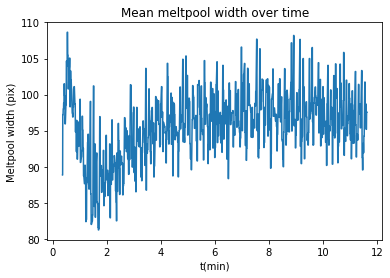

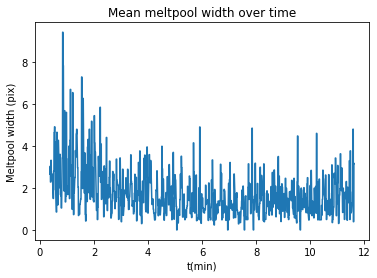

In [164]:
off_frame_names = np.unique(data_df[
    data_df["laser_off_time(ms)"] > 0
]["matching_frame_filename"])
subset = data_df[
    (data_df["laser_on_time(ms)"] > 100)
    & (~data_df["matching_frame_filename"].isin(off_frame_names))
]


fig, ax = plt.subplots()
ax.plot(subset['t(min)'], subset["filtered_mean_width"])
ax.set_xlabel("t(min)")
ax.set_ylabel("Meltpool width (pix)")
ax.set_title("Mean meltpool width over time")
plt.show()

fig, ax = plt.subplots()
ax.plot(subset['t(min)'], subset["filtered_sd_width"])
ax.set_xlabel("t(min)")
ax.set_ylabel("Meltpool width (pix)")
ax.set_title("Mean meltpool width over time")
plt.show()

Compare against the other runs maybe?

In [160]:
np.median(width)

NameError: name 'width' is not defined

In [155]:
xs = np.array([3,2,4])
print(xs)
print(np.sort(xs), xs)

[3 2 4]
[2 3 4] [3 2 4]


In [80]:
frames_path, framename

('..\\data\\ngif_data_thinwall\\ngif data\\20210831_1127_\\Frames',
 '20210831_112816__62454.dat')

In [82]:
frame

array([[1, 1, 0, ..., 1, 2, 1],
       [1, 1, 1, ..., 2, 3, 2],
       [1, 1, 1, ..., 2, 2, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]], dtype=uint8)

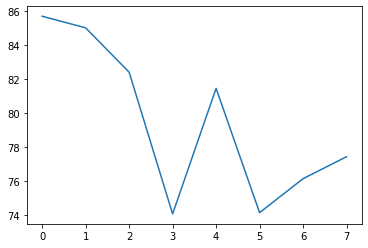

In [60]:
fig, ax = plt.subplots()
ax.plot(mean_widths)
plt.show()